In [1]:

import numpy as np
import pandas as pd
import time


class DriftingDataset:
    def __init__(
        self,
        mean=0,
        std=1,
        data_drift="linear",
        concept_drift="linear",
    ):
        self.mean = mean
        self.std = std
        self.n_features = 2
        self.mapping_weight = np.random.uniform()
        self.mapping_bias = np.random.uniform()
        # self.drift_pattern = "linear"
        # self.drift_idx = 0

    def mapping(self, x):
        z = (x[0] - x[1]) #* self.mapping_weight #+ self.mapping_bias
        ex = 0 if z < 0 else 1
        return ex

    def generate_datapoint(self):
        x = np.random.normal(self.mean, self.std, self.n_features)
        return x, self.mapping(x)

    def increase_data_drift(self):
        self.mean += np.random.normal(0, 0.1, self.n_features)
        # self.std += 0.1
        # self.drift_idx += 1

    # def increase_concept_drift(self):
    #     self.mapping_weights += 1
    #     self.mapping_bias += 1
    #     self.concept_drift_idx += 1

    def __iter__(self):
        def _():
            while True:
                yield self.generate_datapoint()
                self.increase_data_drift()
        return _()


# if __name__ == "__main__":

#     dataset = DriftingDataset()

#     for example in dataset:
#         print(example)
#         time.sleep(1)


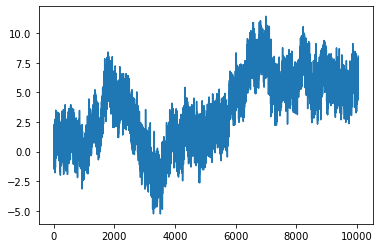

In [6]:
from matplotlib import pyplot as plt
from torch.utils.tensorboard import SummaryWriter


def sample_and_save_data():
    dataset = DriftingDataset(std=1)

    save = []
    datapoints = []
    for idx, example in enumerate(dataset):
        # turn example of (list, float) into a flat list
        save.append(
            {"product_rating": example[0][0], "delivery_duration": example[0][1], "used_offer": example[1]})

        datapoints.append(example[0][0])
        if idx == 10049:
            break

    df = pd.DataFrame(save[:971])
    df.to_csv('data/initial_data.csv', index=False)

    df = pd.DataFrame(save[971:])
    df.to_csv('data/production_data.csv', index=False)
    
    return datapoints


def plot_drifting_data(datapoints):
    plt.plot(datapoints)
    # save  the list called save as a csv file


data = sample_and_save_data()
plot_drifting_data(data)
